Rawaa's Qs:

1.  How many close friends does a student have on average? → statistical model

2.  What’s the relationship between body level and being bullied?
→ statistical model + graphical representation.
3.  Can we predict that a student misses school with no permission given number of close friends, parents understanding problem, feeling lonely and other students kind and helpful? → machine learning model
4. Can we predict the probability of feeling lonely?





In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from ipykernel import kernelapp as app
from sklearn.model_selection import train_test_split
from sklearn import svm ,naive_bayes
from sklearn.metrics import classification_report
from sklearn import tree
from scipy.stats import pearsonr, spearmanr, kendalltau, chi2_contingency
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from helper import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Bullying_2018.csv', sep=r';')

In [4]:
df.head(15)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,,,
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,,,
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,


In [5]:
df.shape

(56981, 18)

In [6]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [7]:
df.isnull().sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

In [8]:
df['body_level']=[int(1)]*df.shape[0]
df.loc[df[df['Were_underweight']=='Yes'].index,'body_level'] = int(0)
df.loc[df[df['Were_overweight']=='Yes'].index,'body_level'] = int(2)
df.loc[df[df['Were_obese']=='Yes'].index,'body_level'] = int(3)
df.loc[df[df['Were_obese'].isnull()].index,'body_level'] = np.nan

df['body_level']

0        NaN
1        NaN
2        1.0
3        1.0
4        NaN
        ... 
56976    2.0
56977    NaN
56978    NaN
56979    NaN
56980    1.0
Name: body_level, Length: 56981, dtype: float64

In [9]:
value_counts = df['body_level'].value_counts()
print(value_counts)

1.0    24644
2.0     8020
3.0     2655
0.0      733
Name: body_level, dtype: int64


In [10]:
df.dropna(inplace=True)
value_counts = df['body_level'].value_counts()
print(value_counts)

1.0    22575
2.0     7323
3.0     2386
0.0      654
Name: body_level, dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32938 entries, 2 to 56980
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   record                                            32938 non-null  int64  
 1   Bullied_on_school_property_in_past_12_months      32938 non-null  object 
 2   Bullied_not_on_school_property_in_past_12_months  32938 non-null  object 
 3   Cyber_bullied_in_past_12_months                   32938 non-null  object 
 4   Custom_Age                                        32938 non-null  object 
 5   Sex                                               32938 non-null  object 
 6   Physically_attacked                               32938 non-null  object 
 7   Physical_fighting                                 32938 non-null  object 
 8   Felt_lonely                                       32938 non-null  object 
 9   Close_friends    

In [12]:
# df.to_csv('/content/drive/MyDrive/processed_Bullying_v2.csv')

# Q1: How many close friends does a student have on average?

In [13]:
df['Close_friends'].mode()

0    3 or more
Name: Close_friends, dtype: object

(array([22938.,     0.,     0.,  5562.,     0.,     0.,  1753.,     0.,
            0.,  2685.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

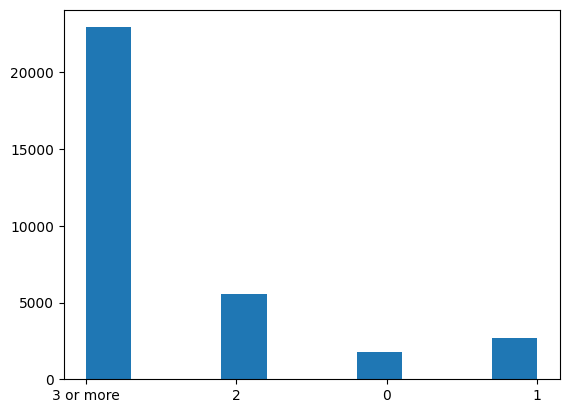

In [14]:
plt.hist(df['Close_friends'])
# close_freinds_mode=df['Close_friends'].mode()


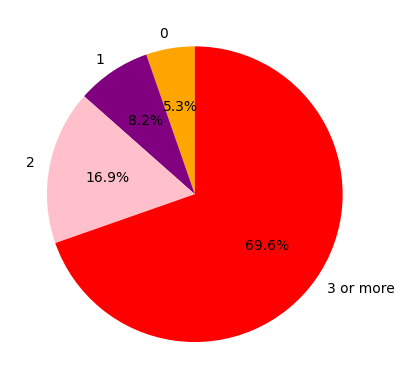

In [15]:
n= df.groupby("Close_friends")["body_level"].count()
labels= ['0', '1', '2', '3 or more']
colors=['orange', 'purple', 'pink', 'red']
sizes0= [n[0], n[1], n[2], n[3]]
plt.pie(sizes0,labels=labels,startangle=90, colors=colors, autopct='%1.1f%%')
plt.show()

Text(0, 0.5, 'Close Friends')

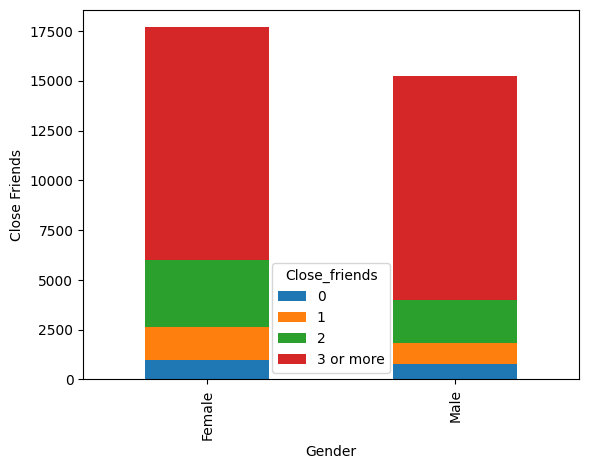

In [16]:
cross_tab = pd.crosstab(df['Sex'], df['Close_friends'])
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Gender')
stacked_bar.set_ylabel('Close Friends')


Text(0, 0.5, 'Close Friends')

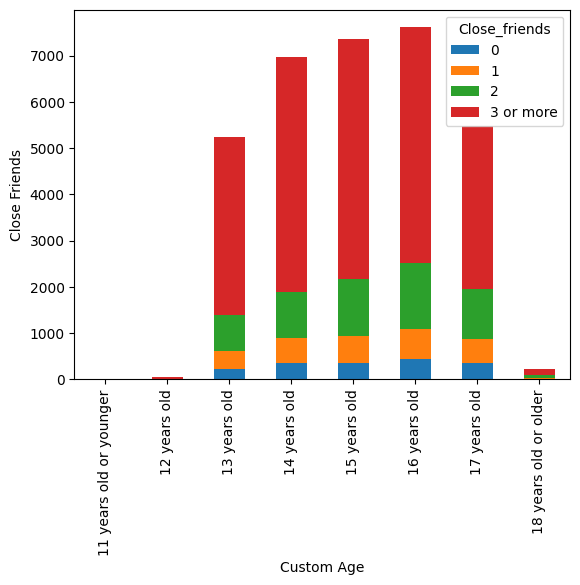

In [17]:
cross_tab = pd.crosstab(df['Custom_Age'], df['Close_friends'])

stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Custom Age')
stacked_bar.set_ylabel('Close Friends')


Text(0, 0.5, 'Number of Students')

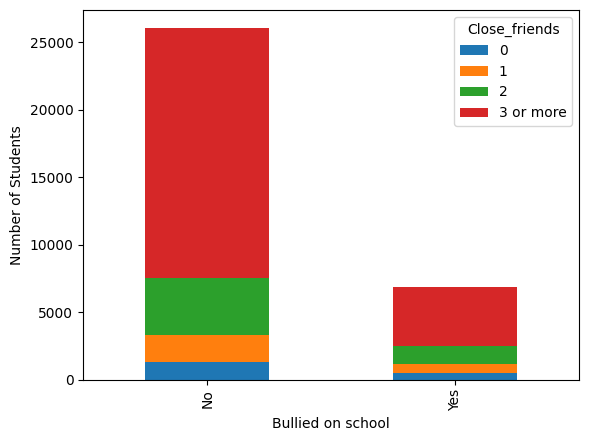

In [18]:
cross_tab = pd.crosstab(df['Bullied_on_school_property_in_past_12_months'] , df['Close_friends'])

stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Bullied on school')
stacked_bar.set_ylabel('Number of Students')


Text(0, 0.5, 'Number of Students')

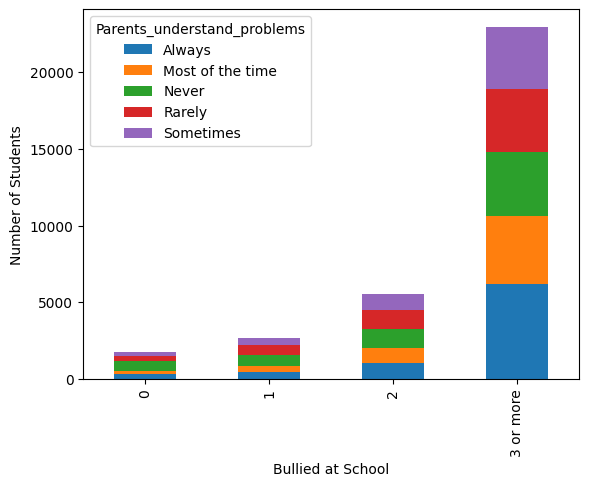

In [19]:
cross_tab = pd.crosstab(df['Close_friends'], df['Parents_understand_problems'])

stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Bullied at School')
stacked_bar.set_ylabel('Number of Students')
# plt.legend(['Not being bullied', 'Being bullied'])


Text(0, 0.5, 'Number of Students')

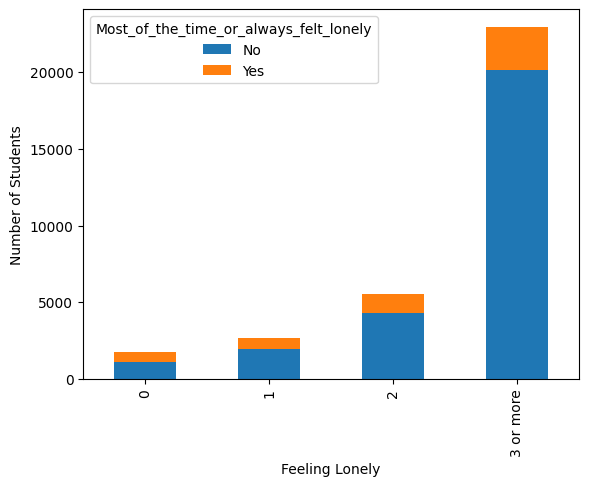

In [20]:
cross_tab = pd.crosstab(df['Close_friends'], df['Most_of_the_time_or_always_felt_lonely'] )

stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Feeling Lonely')
stacked_bar.set_ylabel('Number of Students')
# plt.legend(['Not being bullied', 'Being bullied'])


# Q2: What's the relationship between body level and being bullied?

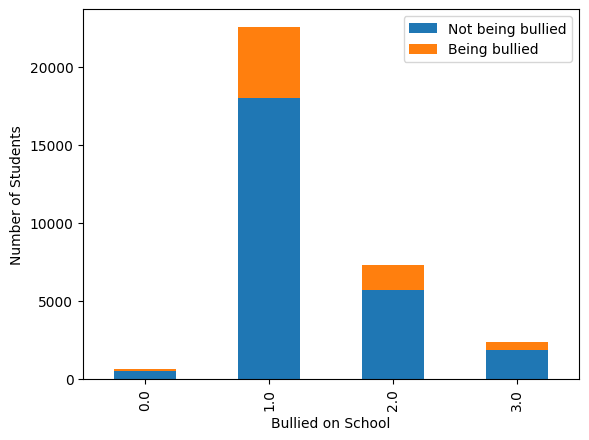

In [21]:
cross_tab = pd.crosstab(df['body_level'], df['Bullied_on_school_property_in_past_12_months'])

stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Bullied on School')
stacked_bar.set_ylabel('Number of Students')
plt.legend(['Not being bullied', 'Being bullied'])


In [22]:
cross_tab['No']=cross_tab['No']/cross_tab['No'].sum()
cross_tab['Yes']=cross_tab['Yes']/cross_tab['Yes'].sum()

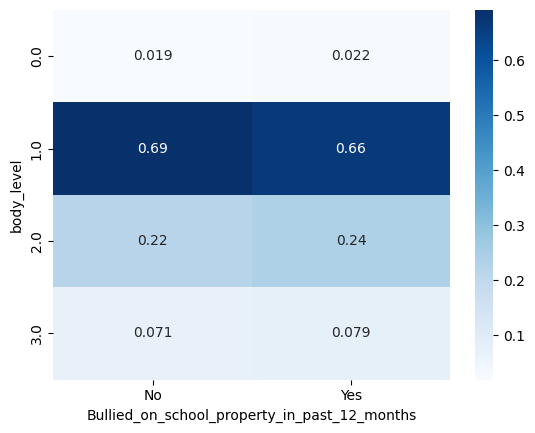

In [23]:
sns.heatmap(cross_tab,cmap="Blues",annot=True)
plt.show()

In [24]:
le = LabelEncoder()
df['Bullied_on_school_property_in_past_12_months'] = le.fit_transform(df['Bullied_on_school_property_in_past_12_months'])
df['Bullied_not_on_school_property_in_past_12_months'] = le.fit_transform(df['Bullied_not_on_school_property_in_past_12_months'])
df['Cyber_bullied_in_past_12_months'] = le.fit_transform(df['Cyber_bullied_in_past_12_months'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Felt_lonely'] = le.fit_transform(df['Felt_lonely'])
df['Miss_school_no_permission'] = le.fit_transform(df['Miss_school_no_permission'])
df['Other_students_kind_and_helpful'] = le.fit_transform(df['Other_students_kind_and_helpful'])
df['Parents_understand_problems'] = le.fit_transform(df['Parents_understand_problems'])
df['Most_of_the_time_or_always_felt_lonely'] = le.fit_transform(df['Most_of_the_time_or_always_felt_lonely'])
df['Missed_classes_or_school_without_permission'] = le.fit_transform(df['Missed_classes_or_school_without_permission'])
df['Custom_Age'] = le.fit_transform(df['Custom_Age'])+13
df['Physically_attacked'] = le.fit_transform(df['Physically_attacked'])
df['Physical_fighting'] = le.fit_transform(df['Physical_fighting'])
df['Close_friends'] = le.fit_transform(df['Close_friends'])
df['Were_obese']= le.fit_transform(df['Were_obese'])
df['Were_overweight']= le.fit_transform(df['Were_overweight'])
df['Were_underweight']= le.fit_transform(df['Were_underweight'])

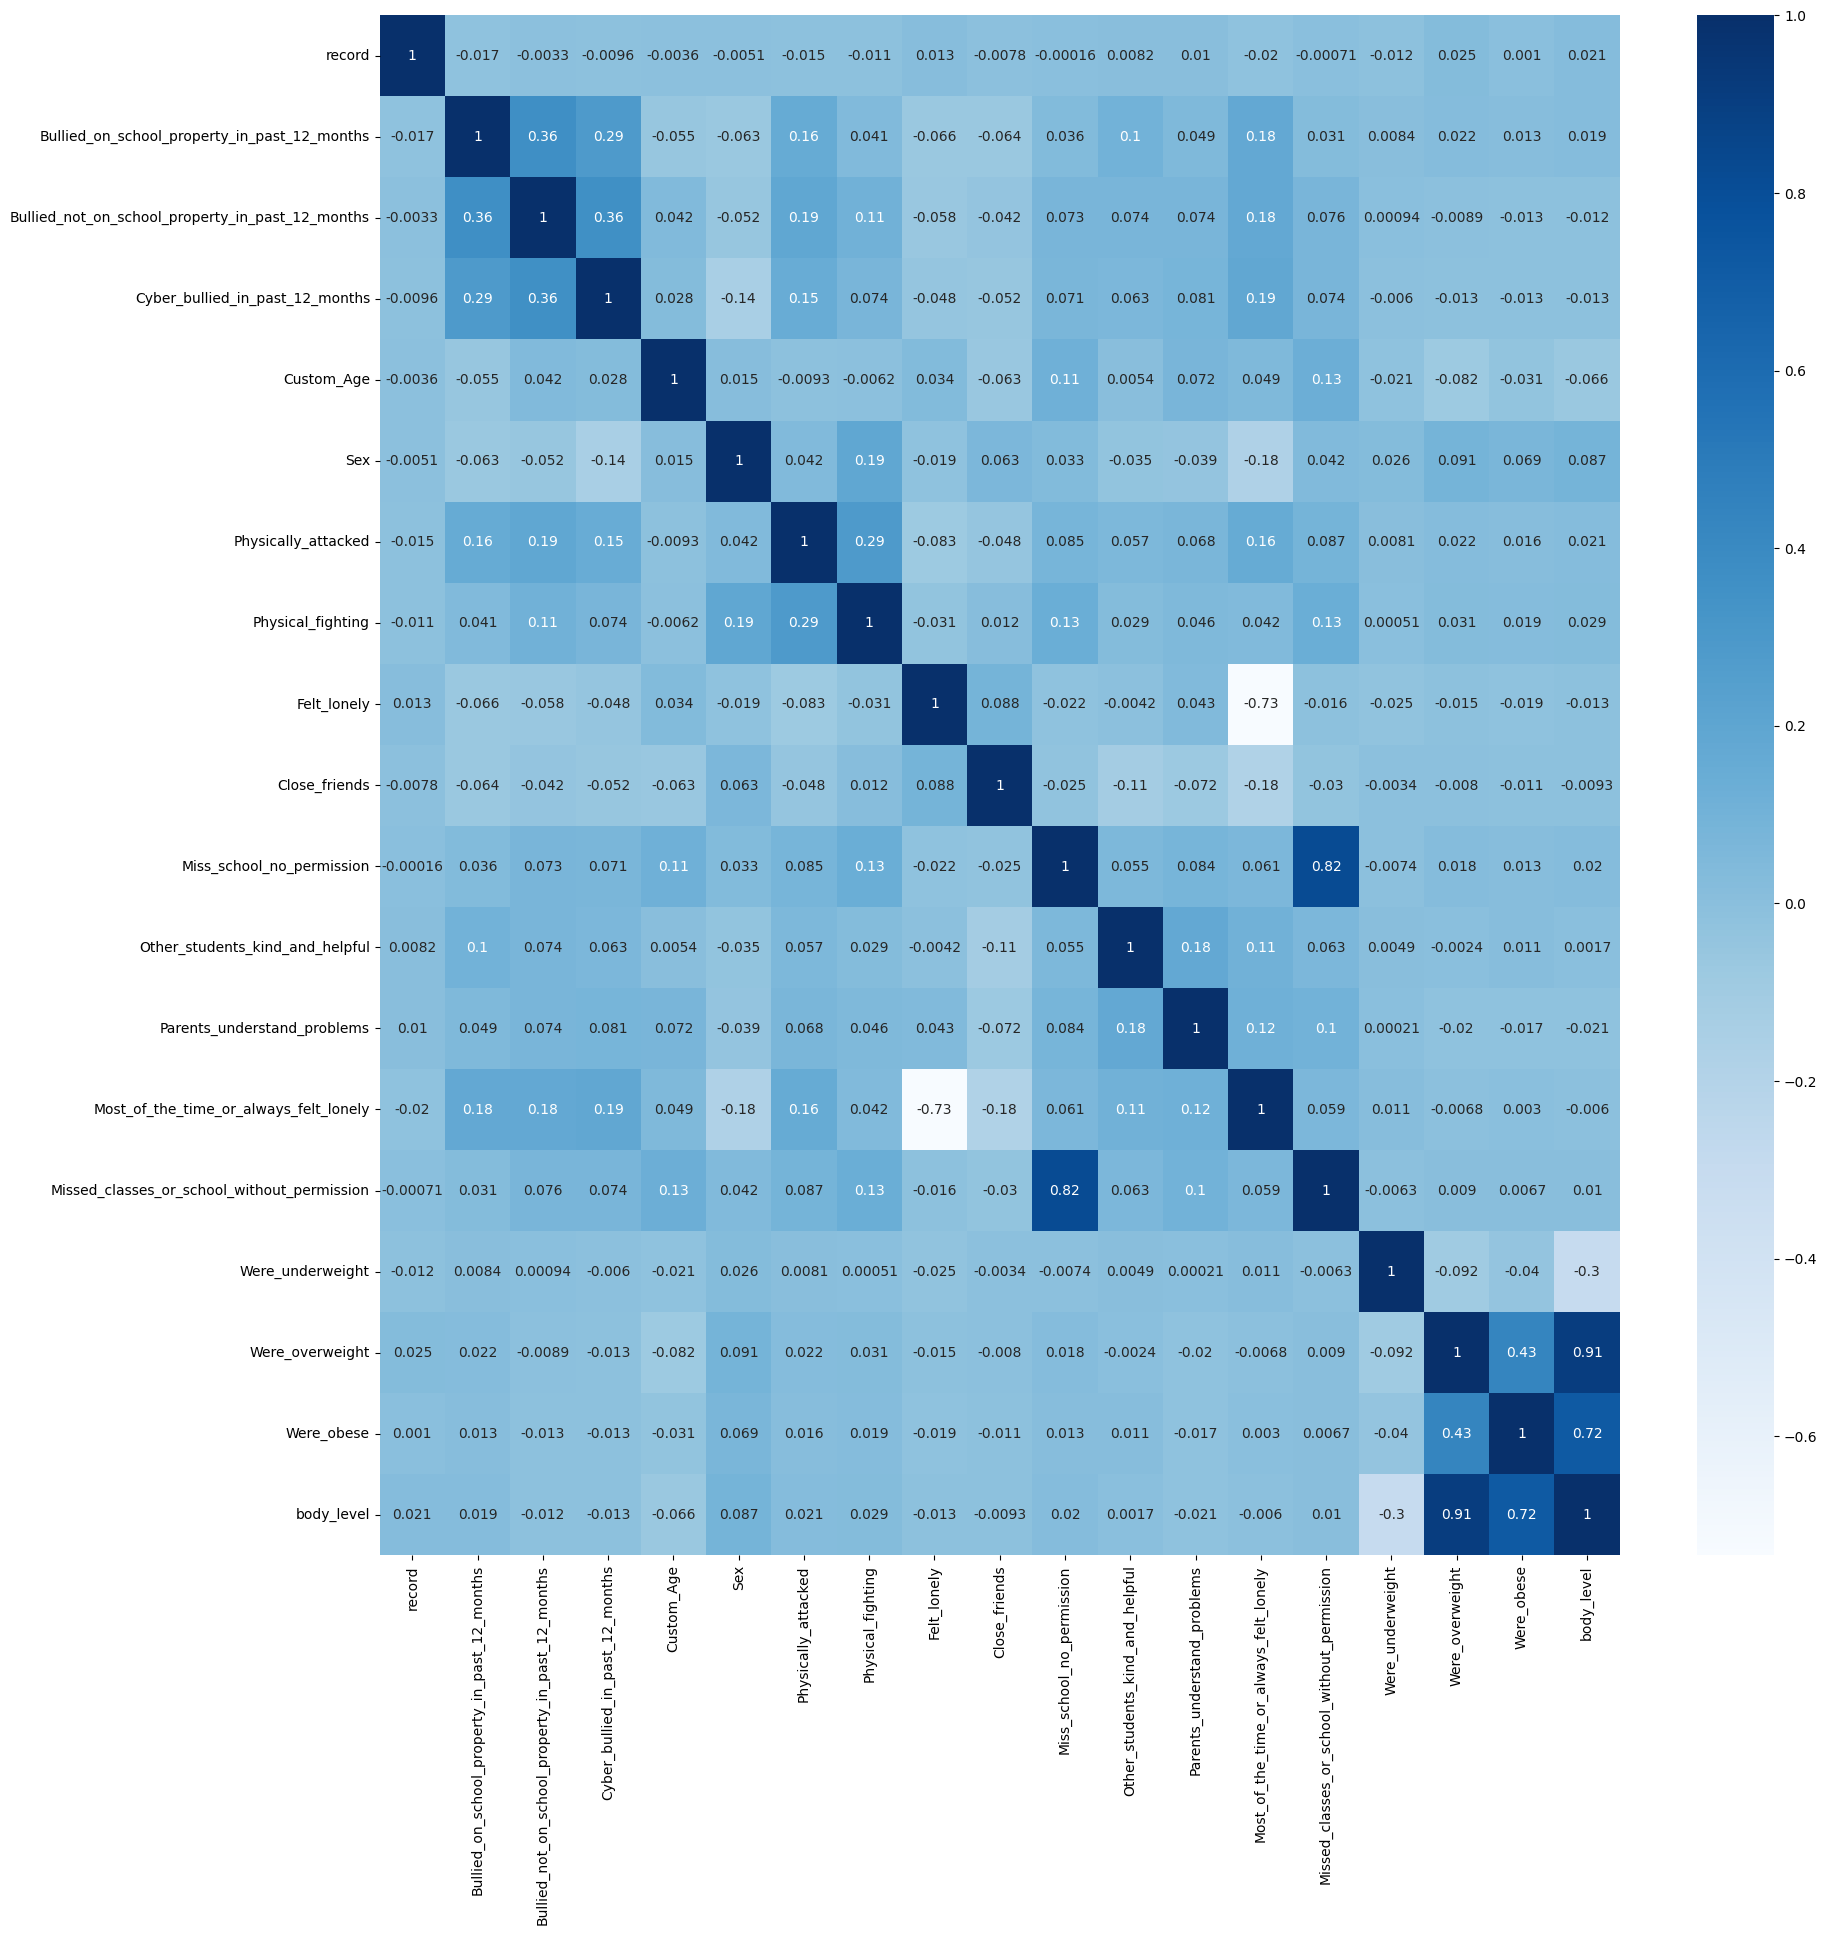

In [25]:
corr = df.corr(numeric_only=False)
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Blues",annot=True)
plt.show()

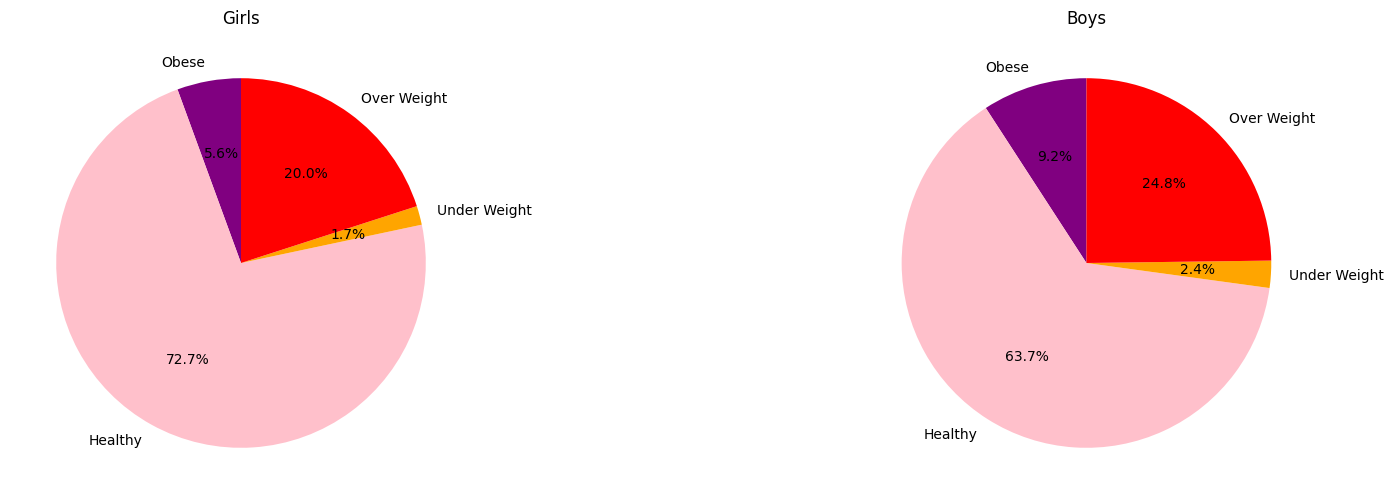

In [26]:
# bullied=df[df["Bullied_on_school_property_in_past_12_months"]==1]
uw= df[df["body_level"]==0].groupby("Sex")["body_level"].count()
h= df[df["body_level"]==1].groupby("Sex")["body_level"].count()
ow= df[df["body_level"]==2].groupby("Sex")["body_level"].count()
ob= df[df["body_level"]==3].groupby("Sex")["body_level"].count()
labels= ['Obese', 'Healthy', 'Under Weight', 'Over Weight']
colors=['purple', 'pink', 'orange', 'red']
sizes0= [ob[0], h[0], uw[0], ow[0]]
sizes1= [ob[1], h[1], uw[1], ow[1]]
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.pie(sizes0,labels=labels,startangle=90, colors=colors, autopct='%1.1f%%')
ax1.set_title('Girls')
ax2.pie(sizes1,labels=labels,startangle=90, colors=colors, autopct='%1.1f%%')
ax2.set_title('Boys')
plt.show()

## Q4

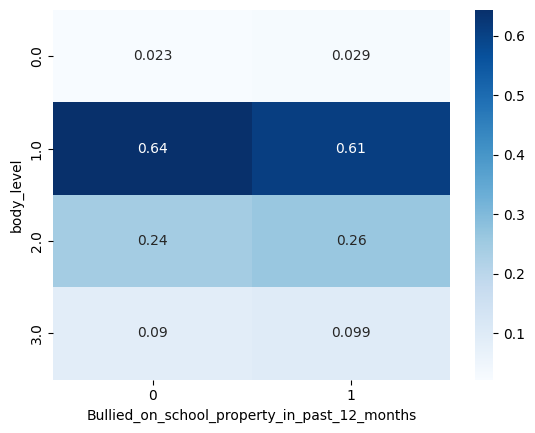

In [27]:
cross_tab = pd.crosstab(df[df['Sex']==1]['body_level'], df[df['Sex']==1]['Bullied_on_school_property_in_past_12_months'])
cross_tab[0]=cross_tab[0]/cross_tab[0].sum()
cross_tab[1]=cross_tab[1]/cross_tab[1].sum()
sns.heatmap(cross_tab,cmap="Blues",annot=True)
plt.show()

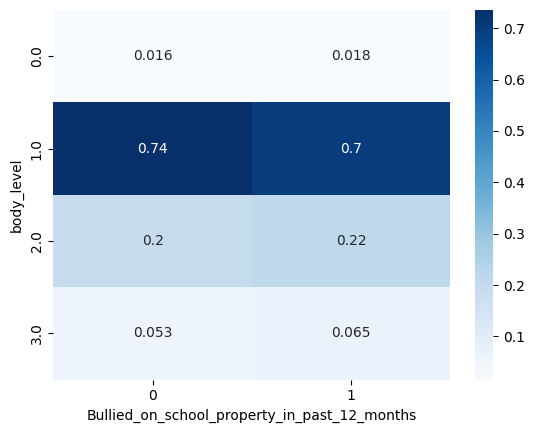

In [28]:
cross_tab = pd.crosstab(df[df['Sex']==0]['body_level'], df[df['Sex']==0]['Bullied_on_school_property_in_past_12_months'])
cross_tab[0]=cross_tab[0]/cross_tab[0].sum()
cross_tab[1]=cross_tab[1]/cross_tab[1].sum()
sns.heatmap(cross_tab,cmap="Blues",annot=True)
plt.show()

In [29]:
print('Chi2_contingency Test:')
n0 = df[df['body_level']==0].groupby("Bullied_on_school_property_in_past_12_months")['body_level'].count()
n1 = df[df['body_level']==1].groupby("Bullied_on_school_property_in_past_12_months")['body_level'].count()
n2 = df[df['body_level']==2].groupby("Bullied_on_school_property_in_past_12_months")['body_level'].count()
n3 = df[df['body_level']==3].groupby("Bullied_on_school_property_in_past_12_months")['body_level'].count()
table=[[n0[0],n1[0],n2[0],n3[0]],[n0[1],n1[1],n2[1],n3[1]]]
stat, p, dof, expected = chi2_contingency(table)
print('stat={}, p={}'.format(stat,p) )
if p > 0.05:
 print('Being bullied probably does not depends on body level')
else:
 print('Being bullied probably depends on body level')

Chi2_contingency Test:
stat=19.662533024597842, p=0.0001993889466717344
Being bullied probably depends on body level


In [30]:
print('Pearsonr Test:')
stat, p = pearsonr(df['body_level'] , df['Bullied_on_school_property_in_past_12_months'])
print('stat={}, p={}'.format(stat,p) )
if p > 0.05:
 print('Being bullied probably does not depends on body level')
else:
 print('Being bullied probably depends on body level')

Pearsonr Test:
stat=0.018842045462178277, p=0.0006267077924602461
Being bullied probably depends on body level


In [31]:
print('Pearsonr Test:')
stat, p = pearsonr(df['body_level'] , df['Bullied_not_on_school_property_in_past_12_months'])
print('stat={}, p={}'.format(stat,p) )
if p > 0.05:
 print('Being bullied probably does not depends on body level')
else:
 print('Being bullied probably depends on body level')

Pearsonr Test:
stat=-0.011637507711867813, p=0.034681067308560576
Being bullied probably depends on body level


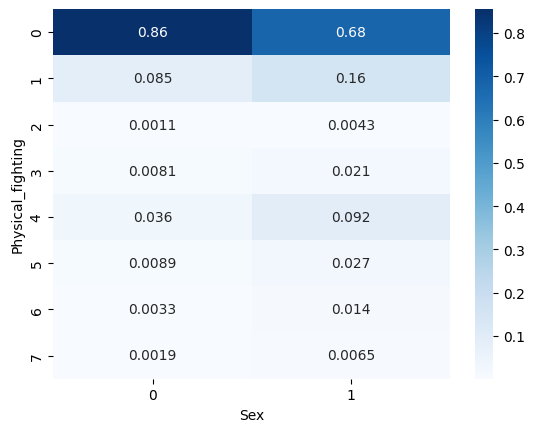

In [32]:
cross_tab = pd.crosstab(df['Physical_fighting'],df['Sex'])
cross_tab[0]=cross_tab[0]/cross_tab[0].sum()
cross_tab[1]=cross_tab[1]/cross_tab[1].sum()
sns.heatmap(cross_tab,cmap="Blues",annot=True)
plt.show()

In [33]:
print('Pearsonr Test:')
stat, p = pearsonr( df['Sex']  , df['Physical_fighting'])
print('stat={}, p={}'.format(stat,p) )
if p > 0.05:
 print('Being bullied probably does not depends on body level')
else:
 print('Being bullied probably depends on body level')

Pearsonr Test:
stat=0.19275106778658585, p=3.795498180299108e-273
Being bullied probably depends on body level


# Q3: Can we predict that a student misses school with no permission given number of close friends, parents understanding problem, feeling lonely and other students kind and helpful?


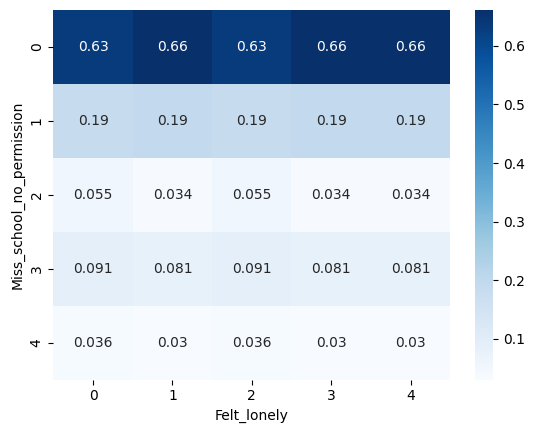

In [34]:
cross_tab = pd.crosstab(df['Miss_school_no_permission'],df['Felt_lonely'])
cross_tab[0]=cross_tab[0]/cross_tab[0].sum()
cross_tab[1]=cross_tab[1]/cross_tab[1].sum()
cross_tab[2]=cross_tab[0]/cross_tab[0].sum()
cross_tab[3]=cross_tab[1]/cross_tab[1].sum()
cross_tab[4]=cross_tab[1]/cross_tab[1].sum()
sns.heatmap(cross_tab,cmap="Blues",annot=True)
plt.show()

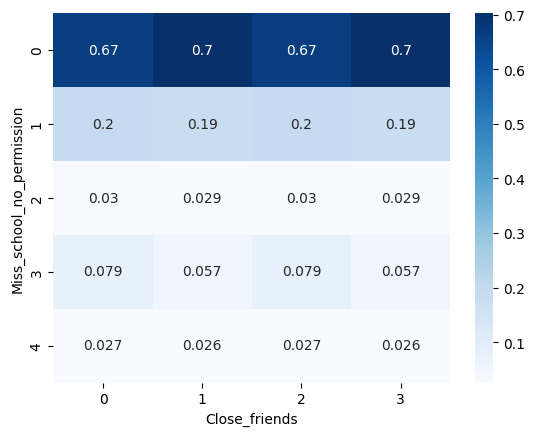

In [35]:
cross_tab = pd.crosstab(df['Miss_school_no_permission'],df['Close_friends'])
cross_tab[0]=cross_tab[0]/cross_tab[0].sum()
cross_tab[1]=cross_tab[1]/cross_tab[1].sum()
cross_tab[2]=cross_tab[0]/cross_tab[0].sum()
cross_tab[3]=cross_tab[1]/cross_tab[1].sum()
sns.heatmap(cross_tab,cmap="Blues",annot=True)
plt.show()

(array([23466.,     0.,  5677.,     0.,     0.,   820.,     0.,  2217.,
            0.,   758.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

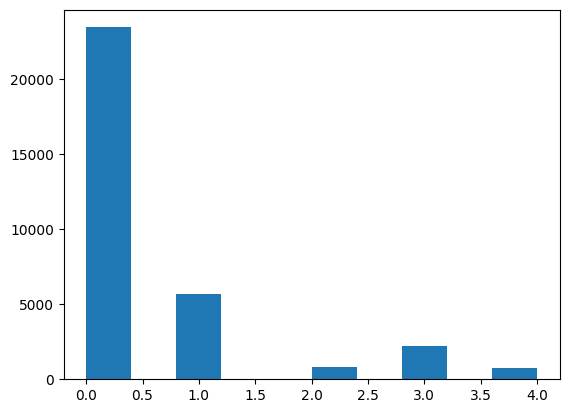

In [36]:
plt.hist(df['Miss_school_no_permission'])

(array([23466.,     0., 23466.,     0.,     0., 23466.,     0., 23466.,
            0., 23466.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

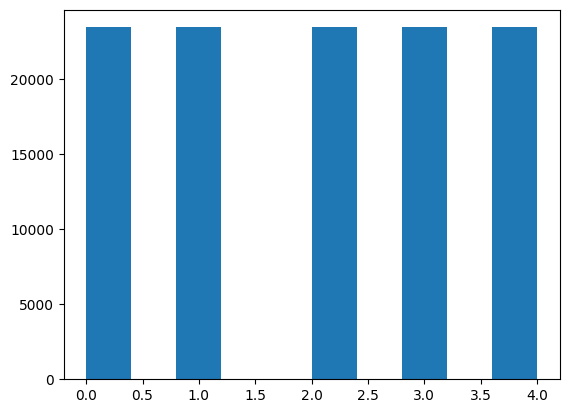

In [37]:
oversample = SMOTE()
y=df['Miss_school_no_permission']
X=df.loc[:, df.columns != 'Miss_school_no_permission']
X0, y = oversample.fit_resample(X, y)
plt.hist(y)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
X=X0[['Close_friends','Parents_understand_problems','Other_students_kind_and_helpful','Felt_lonely']]#.drop(['Felt_lonely'], axis=1)
# y=df['Felt_lonely'].copy()
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.64      0.49      4698
           1       0.25      0.10      0.14      4554
           2       0.32      0.37      0.34      4717
           3       0.27      0.15      0.19      4767
           4       0.30      0.37      0.33      4730

    accuracy                           0.33     23466
   macro avg       0.31      0.33      0.30     23466
weighted avg       0.31      0.33      0.30     23466



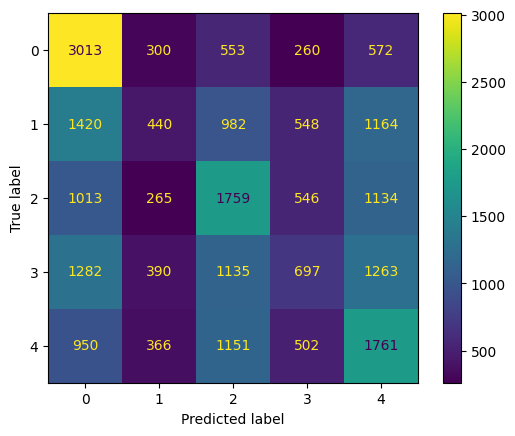

In [39]:
cm=confusion_matrix(y_test,y_pred)
disp =ConfusionMatrixDisplay(cm)
disp.plot()

In [40]:
X=X0.drop(['Missed_classes_or_school_without_permission'], axis=1)
y0=np.where(y<2,0,y-1)
X_train,X_test,y_train,y_test=train_test_split(X, y0, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      9380
           1       0.88      0.92      0.90      4729
           2       0.81      0.73      0.77      4754
           3       0.89      0.93      0.91      4603

    accuracy                           0.86     23466
   macro avg       0.86      0.86      0.86     23466
weighted avg       0.86      0.86      0.86     23466



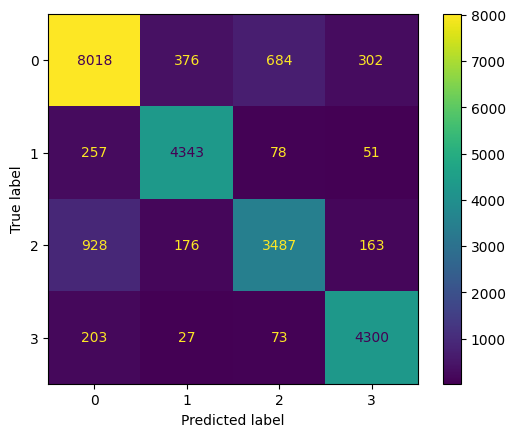

In [41]:
cm=confusion_matrix(y_test,y_pred)
disp =ConfusionMatrixDisplay(cm)
disp.plot()

In [75]:
oversample = SMOTE()
y=df['Most_of_the_time_or_always_felt_lonely']
X=df.drop(['Felt_lonely','Most_of_the_time_or_always_felt_lonely'], axis=1)
X, y = oversample.fit_resample(X, y)

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5512
           1       0.87      0.85      0.86      5508

    accuracy                           0.86     11020
   macro avg       0.86      0.86      0.86     11020
weighted avg       0.86      0.86      0.86     11020



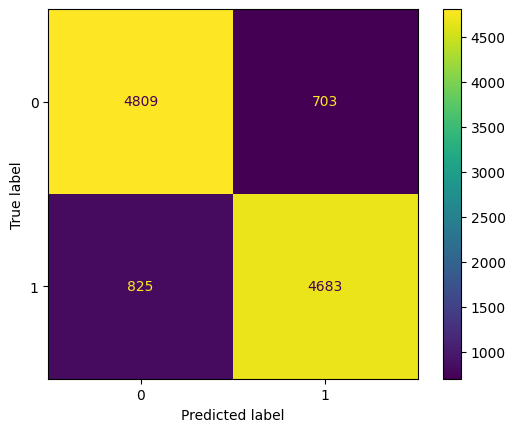

In [77]:
cm=confusion_matrix(y_test,y_pred)
disp =ConfusionMatrixDisplay(cm)
disp.plot()